In [1]:
from fastai.tabular import *
# from fastai.structured import *
# from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,GradientBoostingClassifier
from IPython.display import display
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [10, 6]
}
plot.rcParams.update(params)

In [2]:
df = pd.read_csv('TitanicData/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data = df.copy()

In [5]:
data['Died'] = 1 - data['Survived']

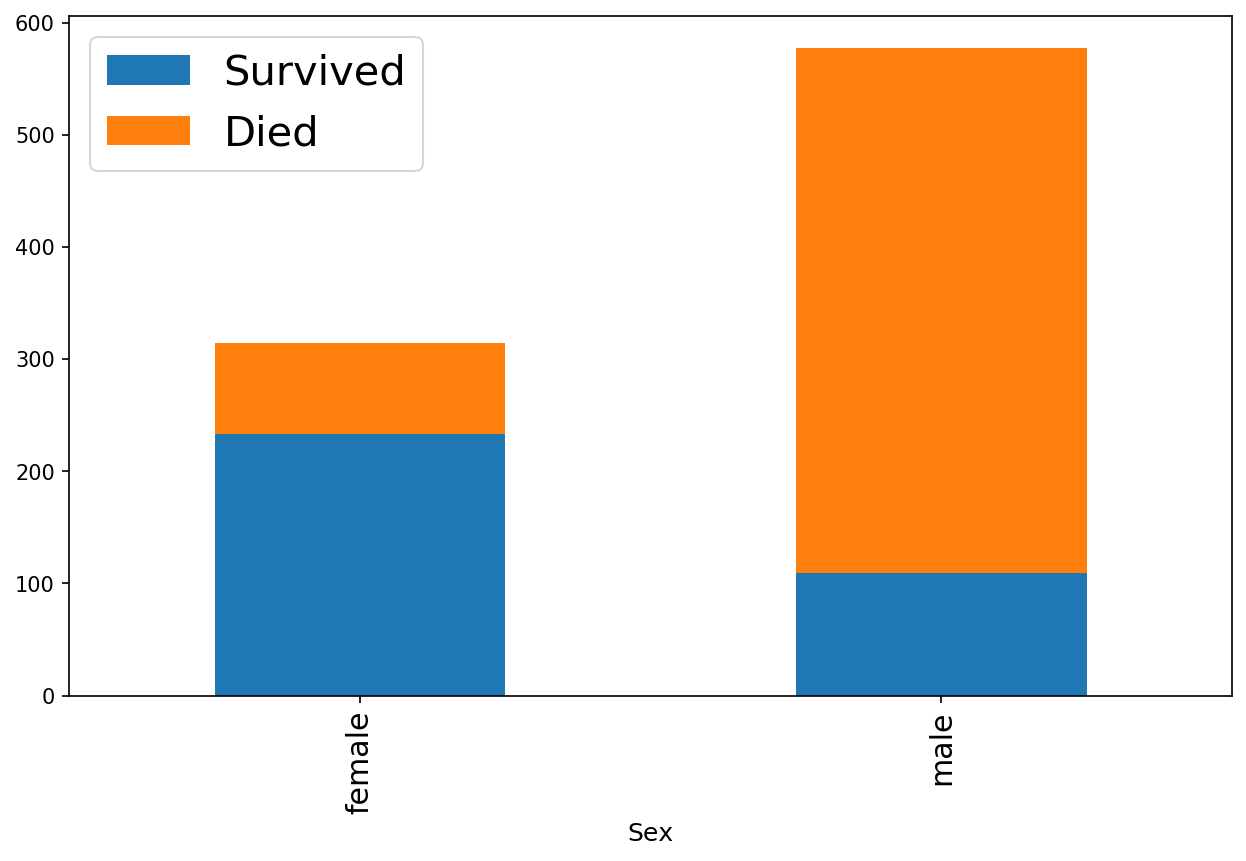

In [6]:
data.groupby('Sex').agg('sum')[['Survived','Died']].plot(kind='bar',stacked=True)

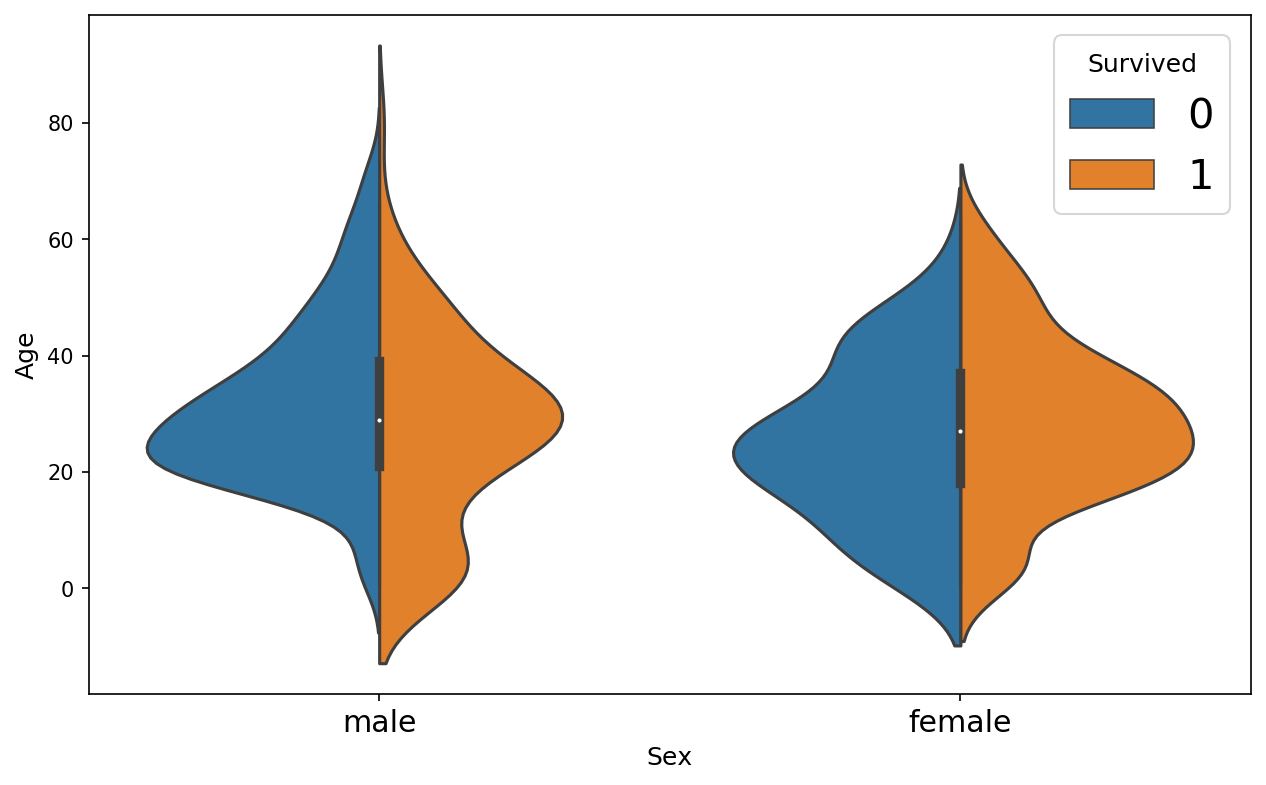

In [7]:
sns.violinplot(x='Sex',y='Age', hue='Survived',data=data, split=True)

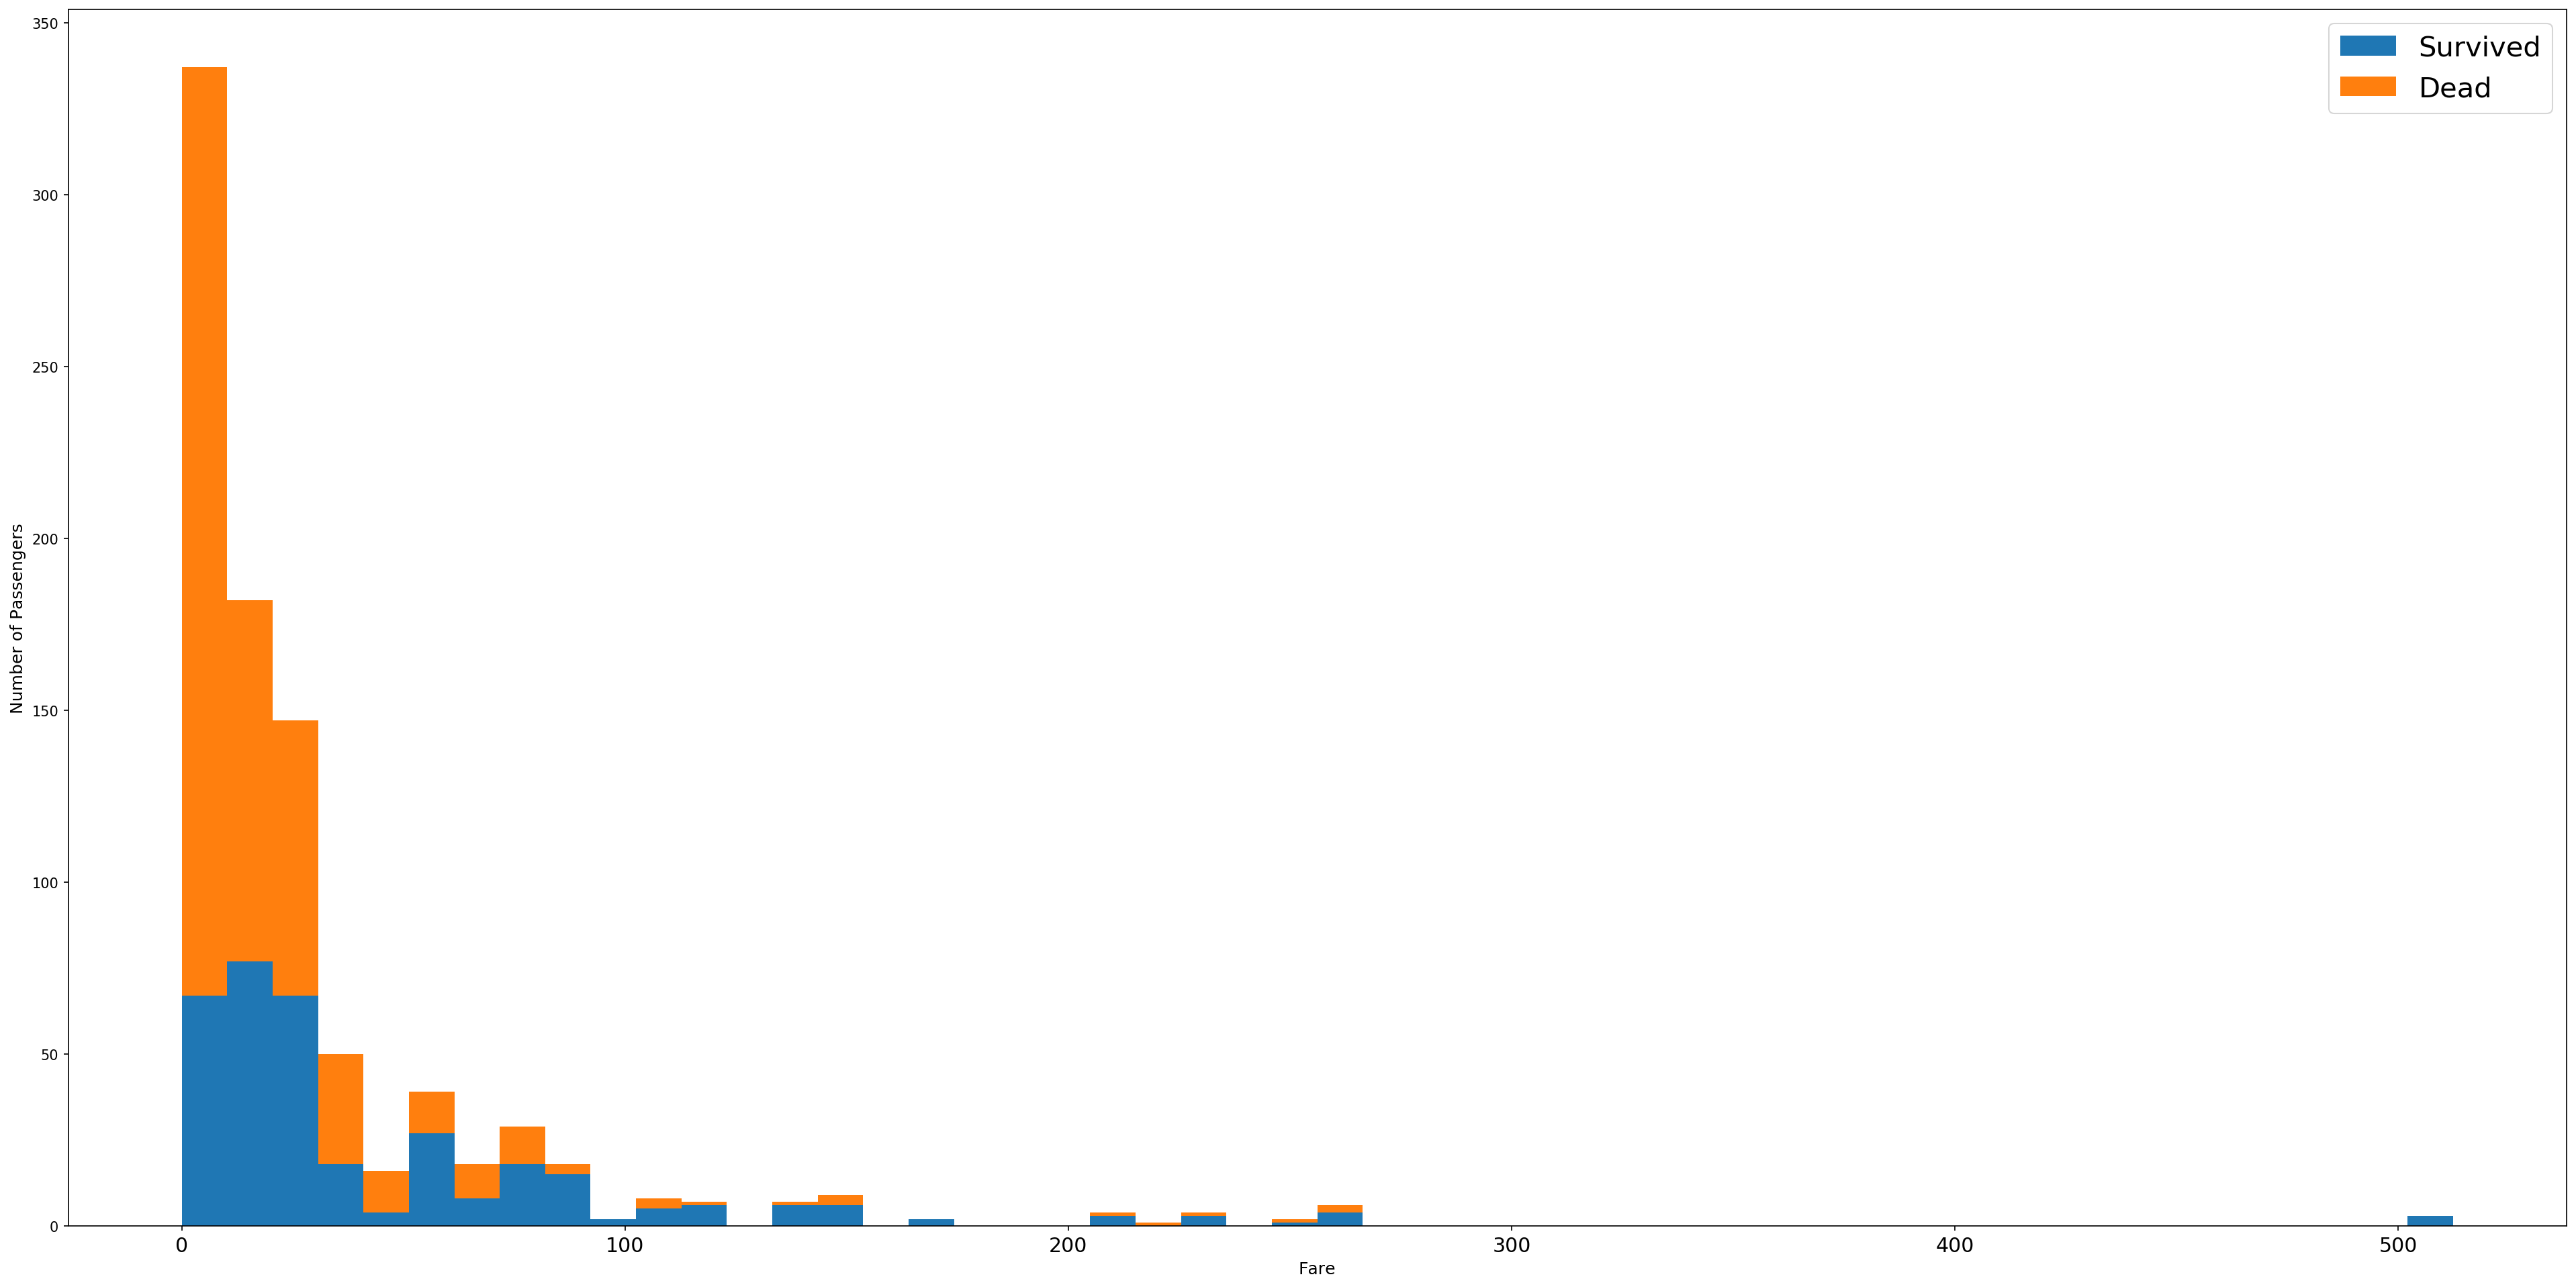

In [8]:
# figure = plt.figure(figsize(32,16)
# plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']]),
#     stacked=True, 
#     bins = 50, label = ['Survived','Dead']

figure = plot.figure(figsize=(32,16))
plot.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], 
         stacked=True,
         bins = 50, label = ['Survived','Dead'])
plot.xlabel('Fare')
plot.ylabel('Number of Passengers',)
plot.legend();

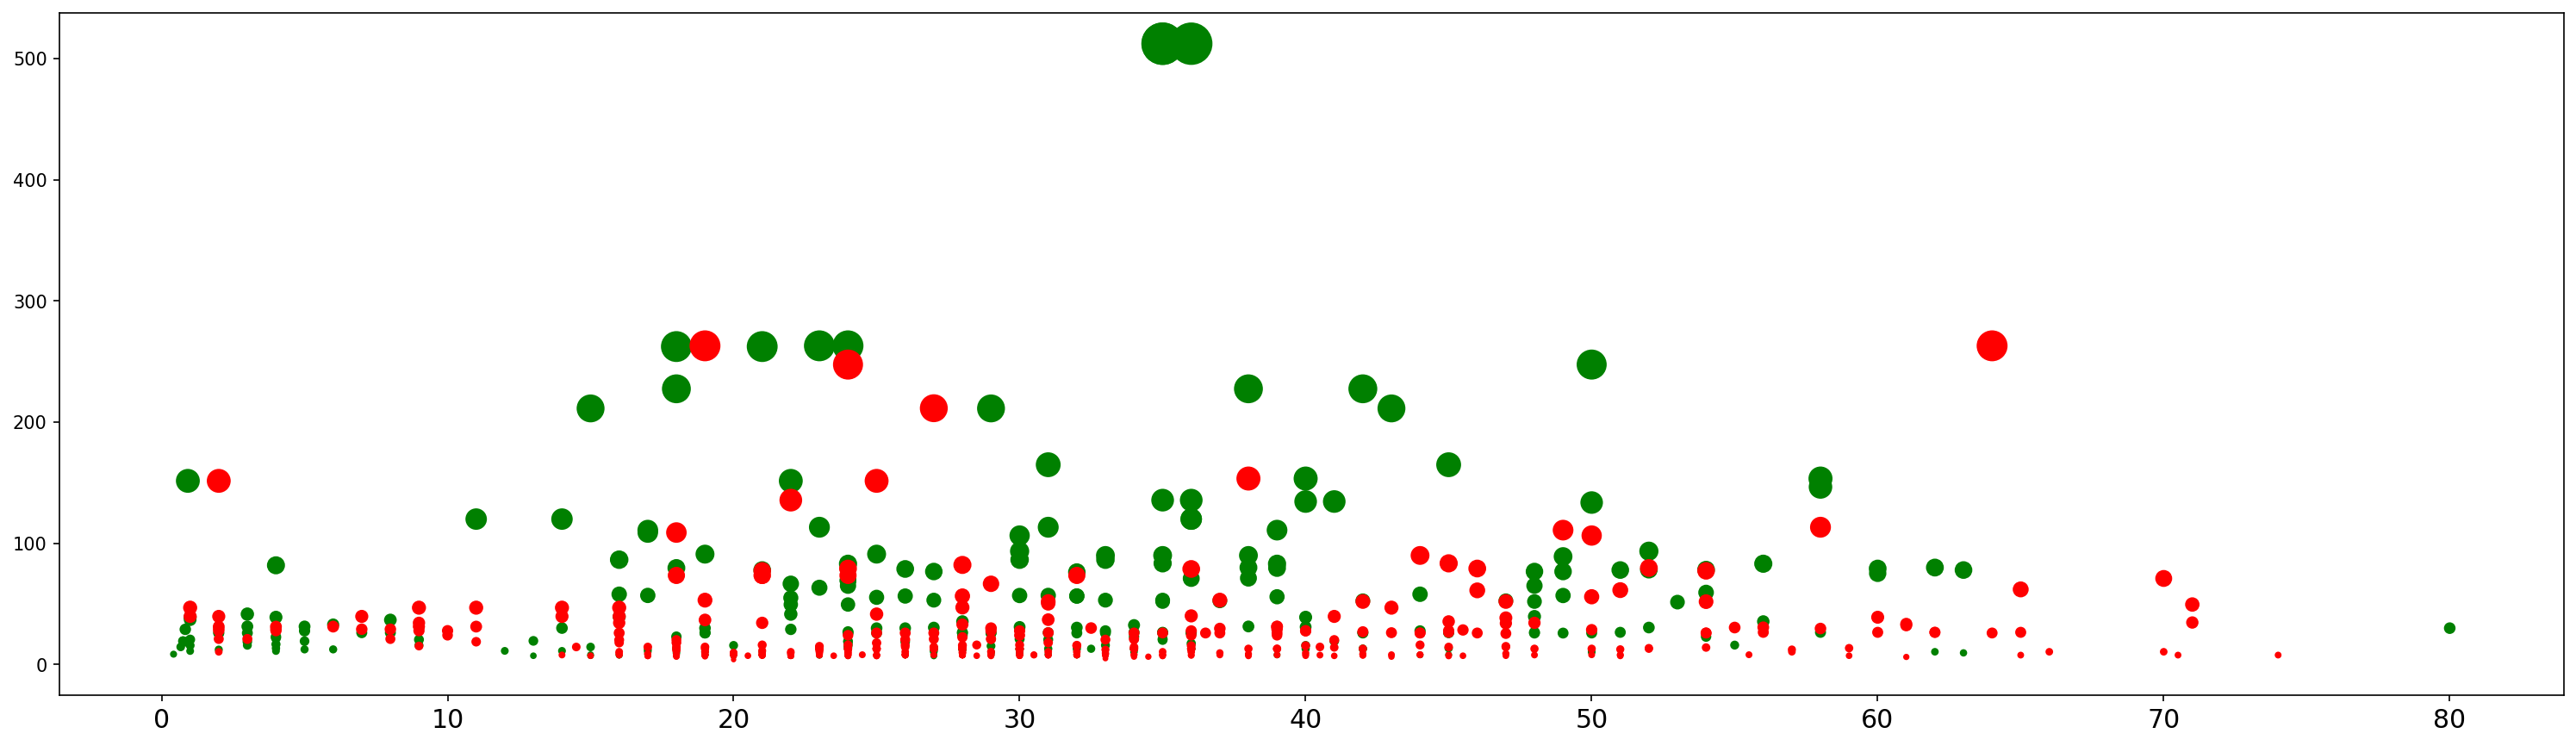

In [9]:
plot.figure(figsize = (25,7))
ax = plot.subplot()
ax.set_yabel = 'Ticket Price'
ax.set_xlabel = 'Age'

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], c = 'green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'],c='red',
s = data[data['Survived'] == 0]['Fare'])



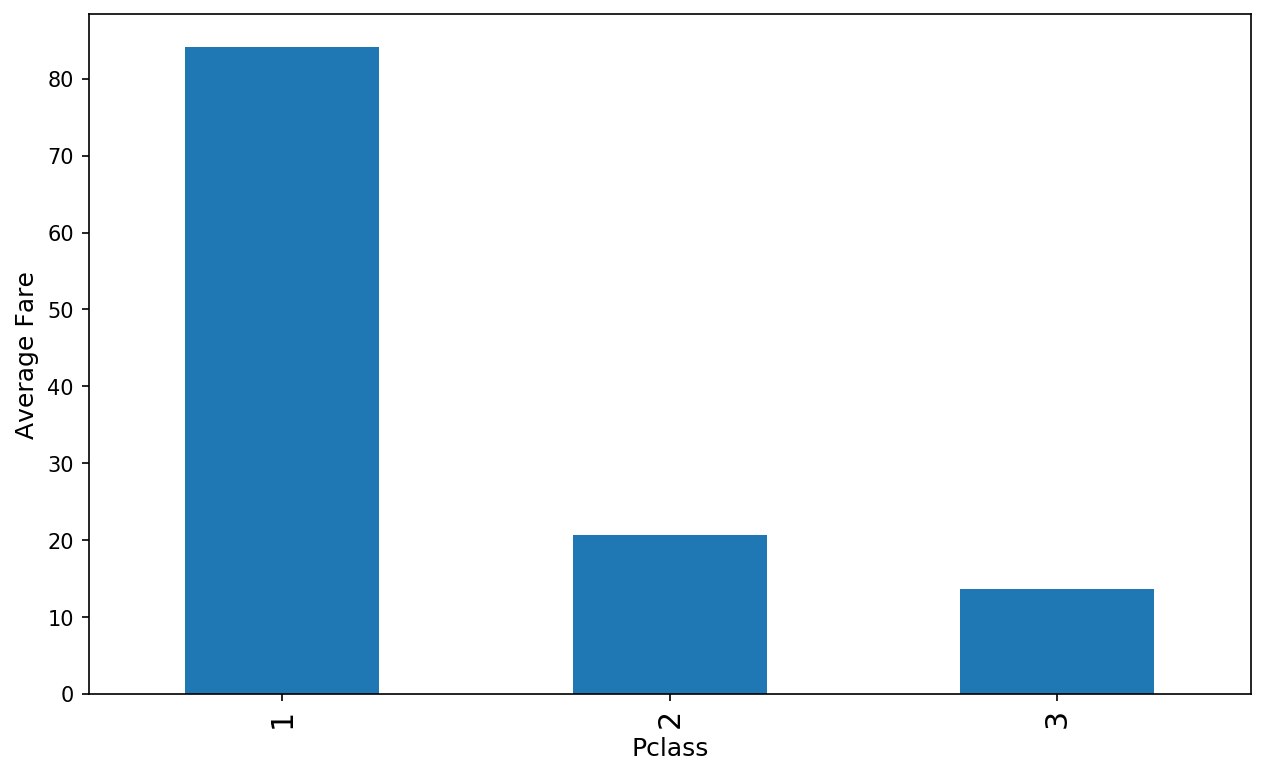

In [10]:
ax = plot.subplot()
ax.set_ylabel('Average Fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',ax=ax)

In [11]:
x_train = df.drop(['Survived'],1)
y_train = df['Survived']
x_test = pd.read_csv('TitanicData/test.csv')

In [12]:
df_combined = x_train.append(x_test)
df_combined.shape

(1309, 11)

In [13]:
df_combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
def display_all(df):
    with pd.option_context('display.max_rows',1000, 'display.max_columns',1000):
        display(df)

In [15]:
display_all(df_combined.tail())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [16]:
procs = [FillMissing, Categorify, Normalize]
[cont_list, cat_list] = cont_cat_split(df,max_card=20,dep_var=None)

In [19]:
tfm = Categorify(cat_list, cont_list)
tfm(df)

In [20]:
df['Sex'].cat.categories

Index(['female', 'male'], dtype='object')

In [30]:
display_all(df_combined.isnull().sum().sort_index()/len(df_combined))

Age            0.200917
Cabin          0.774637
Embarked       0.001528
Fare           0.000764
Name           0.000000
Parch          0.000000
PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
SibSp          0.000000
Ticket         0.000000
dtype: float64

In [42]:
valid_idx = range(len(df))
valid_idx


range(0, 891)

In [47]:
dataa = (TabularList.from_df(df, path='../TitanicData/', cat_names=cat_list, cont_names=cont_list, procs=procs)
                           .split_by_idx(list(range(600,891)))
                           .label_from_df(cols='Survived')
                           .databunch())

In [50]:
dataa.show_batch(rows=10)

PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Age_na,Age,Fare,target
14,0,3,"Andersson, Mr. Anders Johan",male,1,5,347082,#na#,S,False,0.7414,-0.0123,0
552,0,2,"Sharp, Mr. Percival James R",male,0,0,244358,#na#,S,False,-0.1862,-0.1263,0
449,1,3,"Baclini, Miss. Marie Catherine",female,2,1,2666,#na#,C,False,-1.8868,-0.2720,1
460,0,3,"O'Connor, Mr. Maurice",male,0,0,371060,#na#,Q,True,-0.1089,-0.5206,0
79,1,2,"Caldwell, Master. Alden Gates",male,0,2,248738,#na#,S,False,-2.2091,-0.0615,1
506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,1,0,PC 17758,C65,C,False,-0.8819,1.6647,0
501,0,3,"Calic, Mr. Petar",male,0,0,315086,#na#,S,False,-0.9592,-0.5009,0
20,1,3,"Masselmani, Mrs. Fatima",female,0,0,2649,#na#,C,True,-0.1089,-0.5319,1
206,0,3,"Strom, Miss. Telma Matilda",female,0,1,347054,G6,S,False,-2.1187,-0.4620,0
512,0,3,"Webber, Mr. James",male,0,0,SOTON/OQ 3101316,#na#,S,True,-0.1089,-0.5141,0


In [76]:
learn = tabular_learner(data,layers=[20,10],metrics=accuracy,callback_fns=ShowGraph)

epoch,train_loss,valid_loss,accuracy,time
0,0.035780,0.089978,1.000000,00:21


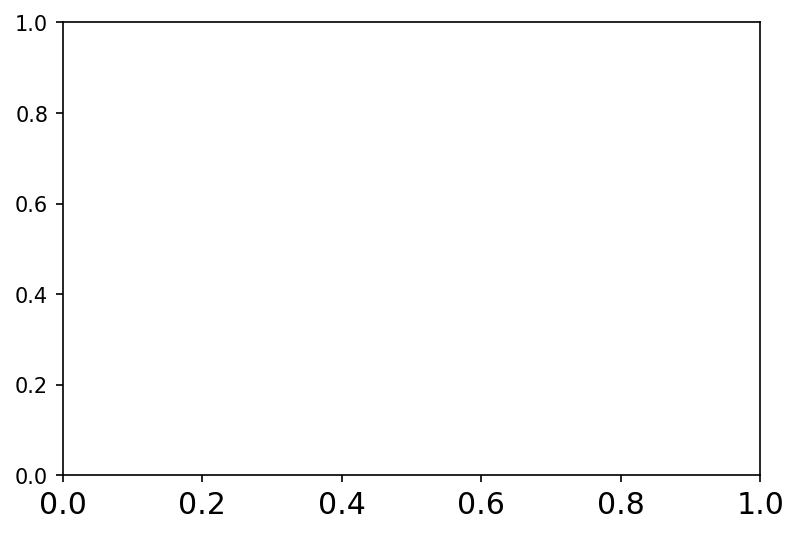

In [79]:
learn.fit(1,1e-2,1e-2)

In [66]:
row = df.iloc[6]
learn.predict(row)

(Category 0, tensor(0), tensor([0.7808, 0.2192]))

In [71]:
preds, y, losses = learn.get_preds(with_loss=True)

In [73]:
interp = ClassificationInterpretation(learn,preds,y,losses)

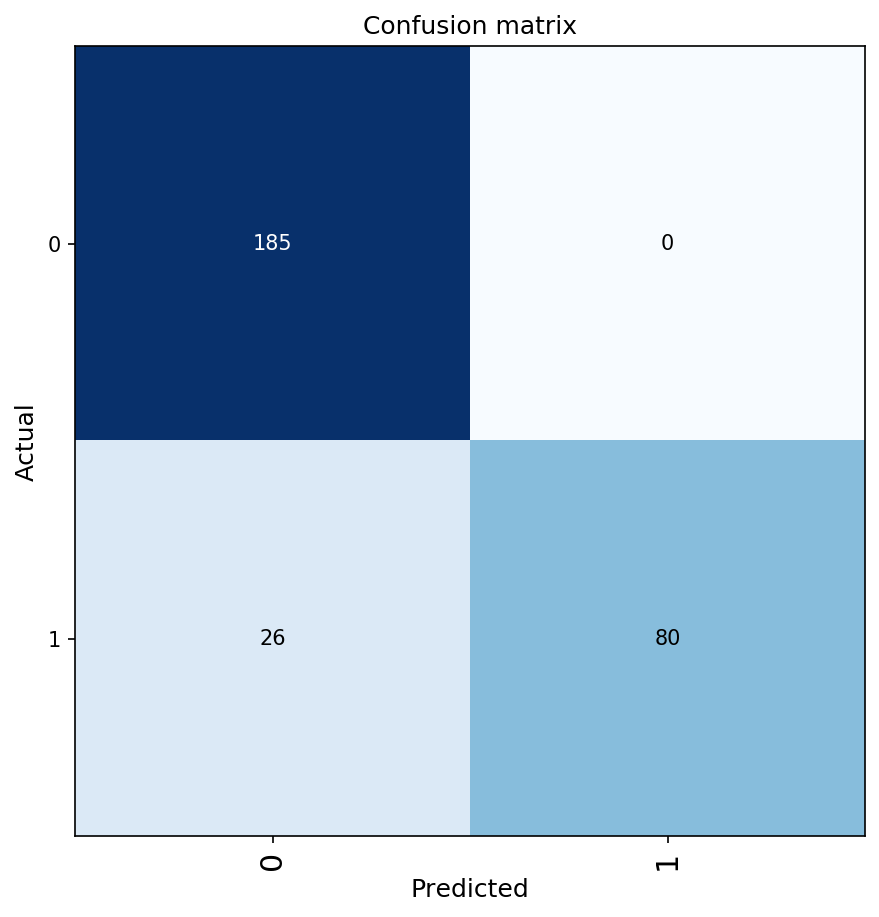

In [74]:
interp.plot_confusion_matrix()